# Load Data and Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Generate Random Data

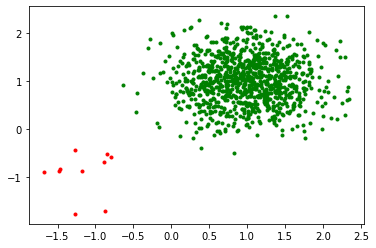

In [2]:
x1 = np.random.normal(1, 0.5, 1000)
x2 = np.random.normal(1, 0.5, 1000)
y = [1 for i in range(1000)]
df1 = pd.DataFrame(list(zip(x1,x2,y)),columns=["x1", "x2" , "y"])
plt.plot(x1,x2,"g.")
x1 = np.random.normal(-1, 0.5, 10)
x2 = np.random.normal(-1, 0.5, 10)
y = [-1 for i in range(1000)]
df1 = df1.append(pd.DataFrame(list(zip(x1,x2,y)),columns=["x1", "x2" , "y"]),ignore_index=True)
plt.plot(x1,x2,"r.")

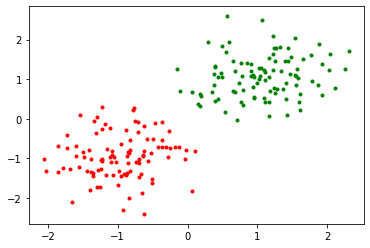

In [3]:
x1 = np.random.normal(1, 0.5, 100)
x2 = np.random.normal(1, 0.5, 100)
y = [1 for i in range(1000)]
df2 = pd.DataFrame(list(zip(x1,x2,y)),columns=["x1", "x2" , "y"])
plt.plot(x1,x2,"g.")
x1 = np.random.normal(-1, 0.5, 100)
x2 = np.random.normal(-1, 0.5, 100)
y = [-1 for i in range(1000)]
df2 = df2.append(pd.DataFrame(list(zip(x1,x2,y)),columns=["x1", "x2" , "y"]),ignore_index=True)
plt.plot(x1,x2,"r.")

# Dataframe 1

# Initialize  Weights and Bias

In [4]:
w =     [0.0,0.0]
b =     0
h =     0
threshold = 1
alpha = 0.1
epoch = 10

 # Train Wieghts

In [5]:
for i in range(epoch):
    for sample in df1.values:
        x1 = sample[0]
        x2 = sample[1]
        y = sample[2]
        net= (x1*w[0]) + (x2*w[1]) + b
        if net>=0 : h=1
        elif net<0 : h=-1
        if(y!=h):
            w[0] = w[0] + (alpha*(y-net)*x1)
            w[1] = w[1] + (alpha*(y-net)*x2)
            b= b + (alpha*(y-net))
    err=0
    y_pred=[]
    acc=0
    for sample in df1.values:
        x1 = sample[0]
        x2 = sample[1]
        y = sample[2]
        net= (x1*w[0]) + (x2*w[1]) + b
        if net>=0:h=1
        elif net<0:h=-1
        err += (y-h)**2
    print("Epoch ",i,", Error: ",err)
    if(err*0.5 < threshold):
        break

Epoch 0, Error: 450.0
Epoch 1, Error: 0.0


In [12]:
print("Weights: ",w)
print("Bias: ",b)

Weights: [0.10522907730455694, 0.08952016912090607]
Bias: 0.010403223120902999


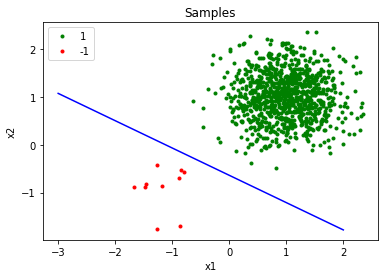

In [7]:
x = np.arange(-3, 3)
y =((w[0]*x)+b)/(-w[1])
tr = df1
plt.plot(tr[tr["y"]==1]["x1"],tr[tr["y"]==1]["x2"],"g.",label ="1")
plt.plot(tr[tr["y"]==-1]["x1"],tr[tr["y"]==-1]["x2"],"r.",label ="-1")
plt.legend()
plt.title("Samples")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x, y, "b-")

# Dataframe 2

# Initialize Weights and Bias

In [8]:
w =     [0.0,0.0]
b =     0
h =     0
threshold = 1
alpha = 0.1
epoch = 10

# Train Wieghts

In [9]:
for i in range(epoch):
    for sample in df2.values:
        x1 = sample[0]
        x2 = sample[1]
        y = sample[2]
        net= (x1*w[0]) + (x2*w[1]) + b
        if net>=0 : h=1
        elif net<0 : h=-1
        if(y!=h):
            w[0] = w[0] + (alpha*(y-net)*x1)
            w[1] = w[1] + (alpha*(y-net)*x2)
            b= b + (alpha*(y-net))
    err=0
    y_pred=[]
    acc=0
    for sample in df2.values:
        x1 = sample[0]
        x2 = sample[1]
        y = sample[2]
        net= (x1*w[0]) + (x2*w[1]) + b
        if net>=0:h=1
        elif net<0:h=-1
        err += (y-h)*(y-h)*0.5
    print("Epoch ",i,", Error: ",err)
    if(err < threshold):
        break

Epoch 0, Error: 62.0
Epoch 1, Error: 0.0


In [13]:
print("Weights: ",w)
print("Bias: ",b)

Weights: [0.10522907730455694, 0.08952016912090607]
Bias: 0.010403223120902999


# Ploting

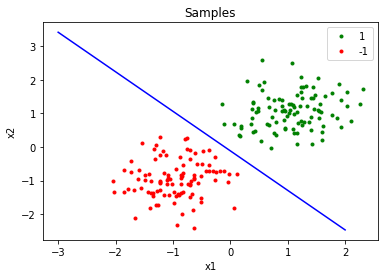

In [11]:
x = np.arange(-3, 3)
y =((w[0]*x+b))/(-w[1])
tr = df2
plt.plot(tr[tr["y"]==1]["x1"],tr[tr["y"]==1]["x2"],"g.",label ="1")
plt.plot(tr[tr["y"]==-1]["x1"],tr[tr["y"]==-1]["x2"],"r.",label ="-1")
plt.legend()
plt.title("Samples")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x, y, "b-")

# Choose smooth activation function

In [14]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

### Gama 0.1

In [15]:
w =     np.array([0.0,0.0])
b =     0
h =     0
gama = 0.1
threshold = 1
alpha = 0.1
epoch = 10
for i in range(epoch):
    for sample in df2.values:
        x = sample[[0,1]]
        y = sample[2]
        net= np.matmul(w,x.reshape(2,1)) + b
        if tanh(net)>=0 : h=1
        elif tanh(net)<0 : h=-1
        if(y!=h):
            w = w + (alpha*tanh_prime(net)*gama*(y-tanh(net))*x)
            b = b + (alpha*tanh_prime(net)*gama*(y-tanh(net)))
    err=0
    y_pred=[]
    acc=0
    for sample in df2.values:
        x = sample[[0,1]]
        y = sample[2]
        net= np.matmul(w,x.reshape(2,1)) + b
        err += ((y-tanh(net))**2)/2
    print("Epoch ",i,", Error: ",err)
    if(err < threshold):
        break

Epoch  0 , Error:  [95.65412151]
Epoch  1 , Error:  [93.94914733]
Epoch  2 , Error:  [93.94914733]
Epoch  3 , Error:  [93.94914733]
Epoch  4 , Error:  [93.94914733]
Epoch  5 , Error:  [93.94914733]
Epoch  6 , Error:  [93.94914733]
Epoch  7 , Error:  [93.94914733]
Epoch  8 , Error:  [93.94914733]
Epoch  9 , Error:  [93.94914733]


### Gama 10

In [16]:
w =     np.array([0.0,0.0])
b =     0
h =     0
gama = 10
threshold = 1
alpha = 0.1
epoch = 10
for i in range(epoch):
    for sample in df2.values:
        x = sample[[0,1]]
        y = sample[2]
        net= np.matmul(w,x.reshape(2,1)) + b
        if tanh(net)>=0 : h=1
        elif tanh(net)<0 : h=-1
        if(y!=h):
            w = w + (alpha*tanh_prime(net)*gama*(y-tanh(net))*x)
            b = b + (alpha*tanh_prime(net)*gama*(y-tanh(net)))
    err=0
    y_pred=[]
    acc=0
    for sample in df2.values:
        x = sample[[0,1]]
        y = sample[2]
        net= np.matmul(w,x.reshape(2,1)) + b
        err += ((y-tanh(net))**2)/2
    print("Epoch ",i,", Error: ",err)
    if(err < threshold):
        break

Epoch  0 , Error:  [17.16052716]
Epoch  1 , Error:  [0.90565936]
